# Proyek Analisis Data: Bike-Sharing 
- **Nama:** Dian Fatonah
- **Email:** dianfatonah19@gmail.com
- **ID Dicoding:** dianftnh

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Berapa persen total pengguna bike-sharing berdasarkan musimnya?
- Pertanyaan 2: Apakah persentase pengguna terdaftar (registered) mengalami peningkatan per bulan dari waktu ke waktu?
- Pertanyaan 3: Bagaimana distribusi antara pengguna biasa (casual) dan pengguna tetap (registered) yang dikelompokkan berdasarkan cuaca dengan mengambil parameter musim? 

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

## Data Wrangling

### Gathering Data

##### Load Tabel Day


In [4]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pada output diatas menampilkan 5 baris pertama dari DataFrame day_df
- Terdapat perbedaan cuaca pada penggunaan sepeda. Pada 2011-01-01 dan 2011-01-02, cuaca berada dalam kondisi mendung (2), dengan suhu yang sedikit lebih tinggi (sekitar 0.34 hingga 0.36). Pada dua hari ini, jumlah pengguna lebih rendah dibandingkan hari-hari berikutnya (985 dan 801 pengguna).

##### Load Tabel Hour

In [4]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada output diatas menampilkan 5 baris pertama dari DataFrame hour_df
- Dari jam 1 hingga jam 4, jumlah total pengguna sepeda (cnt) bervariasi, mulai dari 16 pengguna pada jam pertama, meningkat pada jam kedua (40 pengguna), lalu kembali menurun pada jam-jam berikutnya. Ini menunjukkan perubahan tidak menentu penggunaan sepeda pada jam-jam tersebut.

### Assessing Data

##### Menilai Data day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- jumlah data pada day_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday yang seharusnya menggunakan tipe data datetime
- berdasarkan output diatas menunjukkan bahwa data tersebut berjumlah 731 baris yang berarti kemungkinan data tersebut merupakan data harian selama 2 tahun (731 hari) dengan perhitungan (365 + 366 hari, dengan salah satu tahun mungkin tahun kabisat)

In [6]:
#Mengecek Duplikasi Data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Pada output yang dihasilkan di atas terlihat bahwa tidak ada data yang duplikat.

In [7]:
#Memeriksa Parameter Statistik dari Kolom Numerik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada data tersebut terdapat keanehan pada kolom hum (kelembaban) yaitu min sebesar 0.000000. Hal ini tidak mungkin terjadi di dunia nyata karena kelembaban tidak mungkin minimal 0. Ini kemungkinan besar terjadi karena adanya inaccurate value pada kolom tersebut. 


##### Menilai Data hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- jumlah data pada day_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday yang seharusnya menggunakan tipe data datetime.


In [9]:
#Memastikan Adanya Missing Value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Berdasarkan data di atas tidak ditemukan missing value pada data tersebut.

In [10]:
#Mengecek Duplikasi Data
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Pada output yang dihasilkan di atas terlihat bahwa tidak ada data yang duplikat.

In [11]:
##Memeriksa Parameter Statistik dari Kolom Numerik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada data tersebut terdapat keanehan pada kolom hum (kelembaban) yaitu min sebesar 0.000000. Hal ini tidak mungkin terjadi di dunia nyata karena kelembaban tidak mungkin minimal 0. Ini kemungkinan besar terjadi karena adanya inaccurate value pada kolom tersebut.
- Terdapat keanehan pada kolom windspeed yaitu min 0.000000. Hal ini tidak mungkin terjadi di dunia nyata karena kecepatan angin tidak mungkin minimal 0. Ini kemungkinan besar terjadi karena adanya inaccurate value pada kolom tersebut.


**Masalah yang ditemukan pada saat proses assessing data:**

#day_df
- Tipe data: Terdapat kesalahan tipe data untuk kolom dteday
- Missing Value: -
- Duplicate data: -
- Inaccurate value: Terdapat inaccurate pada kolom hum

#hour_df
- Tipe data: Terdapat kesalahan tipe data untuk kolom dteday
- Missing Value: -
- Duplicate data: -
- Inaccurate value: Terdapat inaccurate pada kolom hum dan windspeed.

### Cleaning Data

#### Menangani Inccurate Value pada Data day_df

In [34]:
#Menampilkan baris data yang memiliki nilai kelembaban (hum) minimum
day_df[day_df.hum == day_df.hum.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
87,88,2011-03-29,2,0,3,0,2,1,1,0.3025,0.292908,0.0,0.226996,317,2108,2425


In [49]:
#Mengganti nilai minimum dalam kolom 'hum' dengan nilai baru
day_df['hum'] = day_df['hum'].replace(day_df['hum'].min(), 0.330000)

In [47]:
#Memastikan nilai minimum dalam kolom 'hum' sudah berubah
day_df[day_df.hum == day_df.hum.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
464,465,2012-04-09,2,1,4,0,1,1,1,0.489167,0.476638,0.3175,0.358196,905,4680,5585


**Insight:**
- Pada data day_df kolom 'hum' nilai minimum yang semula dari 0.0 telah berubah menjadi 0.3175 menggunakan fungsi replace().

#### Menangani Inccurate Value pada Data hour_df

##### Memperbaiki value pada Kolom 'hum'

In [48]:
#Menampilkan baris data yang memiliki nilai kelembaban (hum) minimum
hour_df[hour_df.hum == hour_df.hum.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


In [63]:
#Mengganti nilai minimum dalam kolom 'hum' dengan nilai baru
hour_df['hum'] = hour_df['hum'].replace(hour_df['hum'].min(), 0.330000)

In [64]:
#Memastikan nilai minimum dalam kolom 'hum' sudah berubah
hour_df[hour_df.hum == hour_df.hum.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1108,1109,2011-02-18,1,0,2,22,0,5,1,1,0.54,0.5152,0.1,0.2537,19,88,107


**Insight:**
- Pada data hour_df kolom 'hum' nilai minimum yang semula dari 0.0 telah berubah menjadi 0.1 menggunakan fungsi replace().

##### Memperbaiki Value pada Kolom 'windspeed'

In [69]:
#Menampilkan baris data yang memiliki nilai kecepatan angin (windspeed) minimum
hour_df[hour_df.windspeed == hour_df.windspeed.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17319,17320,2012-12-29,1,1,12,12,0,6,0,3,0.20,0.2424,1.00,0.0,5,43,48
17320,17321,2012-12-29,1,1,12,13,0,6,0,3,0.20,0.2424,1.00,0.0,13,71,84
17322,17323,2012-12-29,1,1,12,15,0,6,0,2,0.24,0.2424,0.87,0.0,19,110,129
17330,17331,2012-12-29,1,1,12,23,0,6,0,2,0.26,0.2424,0.60,0.0,0,32,32


In [72]:
#Mengganti nilai minimum dalam kolom 'windspeed' dengan nilai baru
hour_df['windspeed'] = hour_df['windspeed'].replace(hour_df['windspeed'].min(), 0.015000)

In [74]:
#Memastikan nilai minimum dalam kolom 'windspeed' sudah berubah
hour_df[hour_df.windspeed == hour_df.windspeed.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.015,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.015,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.015,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.015,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.015,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17319,17320,2012-12-29,1,1,12,12,0,6,0,3,0.20,0.2424,1.00,0.015,5,43,48
17320,17321,2012-12-29,1,1,12,13,0,6,0,3,0.20,0.2424,1.00,0.015,13,71,84
17322,17323,2012-12-29,1,1,12,15,0,6,0,2,0.24,0.2424,0.87,0.015,19,110,129
17330,17331,2012-12-29,1,1,12,23,0,6,0,2,0.26,0.2424,0.60,0.015,0,32,32


**Insight:**
- Pada data hour_df kolom 'windspeed' nilai minimum yang semula dari 0.0 telah berubah menjadi 0.015 menggunakan fungsi replace().

#### Mengubah tipe data pada kolom 'dteday'

In [76]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [77]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      0 non-null      object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  0 non-null      object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [5]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Pada data day_df kolom 'dteday' tipe datanya sudah berubah dari object menjadi datetime.
- Pada data hour_df kolom 'dteday' tipe datanya sudah berubah dari object menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [95]:
# Melihat rangkuman parameter statistik data day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**
- Pada data diatas data terdapat 731 baris menunjukkan tidak ada data yang hilang.

In [136]:
# Mengubah nilai numerik menjadi label pada 'season'
day_df['season'] = day_df['season'].replace({
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Fall'
})

# Mengubah nilai numerik menjadi label pada 'weathersit'
day_df['weathersit'] = day_df['weathersit'].replace({
    1: 'Cerah',
    2: 'Berawan',
    3: 'Mendung',
    4: 'Hujan'
})

# Cek apakah perubahan berhasil
print(day_df[['season', 'weathersit']].head())


   season weathersit
0  Winter    Berawan
1  Winter    Berawan
2  Winter      Cerah
3  Winter      Cerah
4  Winter      Cerah


**Insight:**
- Pada perintah diatas adalah untuk mengubah nilai numerik agar berubah menjadi label agar pada perintah selanjutnya dapat terlihat jelas arti keterangan pada nilai numerik dari 0-4

In [110]:
# Berapa persen total pengguna bike-sharing berdasarkan musimnya?
day_df.groupby(['season']).sum()[['cnt']]/day_df['cnt'].sum()

,cnt
season,
Fall,0.255601
Spring,0.278979
Summer,0.322269
Winter,0.143150


**Insight:**
- Berdasarkan output diatas, saya memperoleh data diantaranya total pengguna pada musim gugur (fall) sebesar 25.6%, total pengguna pada musim semi (spring) sebesar 27.9%, total pengguna pada musim panas (summer) sebesar 32.2%, total pengguna pada musim dingin (winter) sebesar 14.3%.

In [278]:
#Apakah persentase pengguna terdaftar (registered riders) mengalami peningkatan per bulan dari waktu ke waktu?
day_df.groupby(['mnth'])['registered'].sum()/day_df.groupby('mnth')['cnt'].sum()

mnth
1     0.910756
2     0.901138
3     0.805854
4     0.774049
5     0.773023
6     0.786610
7     0.773424
8     0.794874
9     0.796749
10    0.814613
11    0.856364
12    0.897207
dtype: float64

**Insight:**
- Pada data diatas, pengguna tetap pada bulan januari sampai bulan mei mengalami penurunan, kemudian mengalami peningkatan menuju bulan juni. Namun kembali turun pada bulan juli. Kemudian, persentase pengguna tetap mengalami peningkatan dibulan-bulan berikutnya sampai desember.

In [287]:
# Bagaimana distribusi antara pengguna biasa (casual) dan pengguna tetap (registered) yang dikelompokkan berdasarkan cuaca dengan mengambil parameter musim? 

# Mengelompokkan berdasarkan 'weathersit' dan hitung agregasi
result = day_df.groupby(by=["weathersit", "season"], observed=True).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': ['sum', 'max', 'min', 'mean', 'std']
    
})

# Menampilkan hasil
print(result)

                         casual registered     cnt                           \
                            sum        sum     sum   max   min         mean   
weathersit season                                                             
1          Musim Dingin   32051     272486  304537  6606   431  2872.990566   
           Musim Gugur   118207     476115  594322  8714  1495  5554.411215   
           Musim Panas   173020     638097  811117  8173  3285  5793.692857   
           Musim Semi    123068     424908  547976  8294  1685  4981.600000   
2          Musim Dingin   16236     170133  186369  5582   683  2662.414286   
           Musim Gugur    46725     259262  305987  7852  1096  4781.046875   
           Musim Panas    49818     177090  226908  7582  1115  5276.930233   
           Musim Semi     56997     220597  277594  8362   605  3965.628571   
3          Musim Dingin     411       6004    6415  2594   441  1283.000000   
           Musim Gugur     1754      21111   22865  

**Insight:**
- Ouput diatas menampilkan mengenai jumlah pengguna biasa dan pengguna tetap yang diambil dari parameter cuaca (weathersit) dan musim (season)

### Explore Data hour_df

In [129]:
# Melihat rangkuman parameter statistik data hour_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627661,0.191979,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191894,0.119484,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.100000,0.015000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Pada data diatas data terdapat 17379 baris menunjukkan tidak ada data yang hilang.

In [132]:
# Mengubah nilai numerik menjadi label pada 'season'
hour_df['season'] = hour_df['season'].replace({
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Fall'
})

# Mengubah nilai numerik menjadi label pada 'weathersit'
hour_df['weathersit'] = hour_df['weathersit'].replace({
    1: 'Cerah',
    2: 'Berawan',
    3: 'Mendung',
    4: 'Hujan'
})

# Cek apakah perubahan berhasil
print(_df[['season', 'weathersit']].head())

   season weathersit
0  Winter      Cerah
1  Winter      Cerah
2  Winter      Cerah
3  Winter      Cerah
4  Winter      Cerah


**Insight:**
- Pada perintah diatas adalah untuk mengubah nilai numerik agar berubah menjadi label agar pada perintah selanjutnya dapat terlihat jelas arti keterangan pada nilai numerik dari 0-4.

In [147]:
# Berapa persen total pengguna bike-sharing berdasarkan musimnya?
hour_df.groupby(['season'])[['cnt']].sum() / hour_df['cnt'].sum()

,cnt
season,
Fall,0.255601
Spring,0.278979
Summer,0.322269
Winter,0.143150


**Insight:**

- Berdasarkan output diatas, saya memperoleh data diantaranya total pengguna pada musim gugur (fall) sebesar 25.5%, total pengguna pada musim semi (spring) sebesar 27.8%, total pengguna pada musim panas (summer) sebesar 32.2%, total pengguna pada musim dingin (winter) sebesar 14.3%.

In [279]:
# Apakah persentase pengguna terdaftar (registered riders) mengalami peningkatan per bulan dari waktu ke waktu?
hour_df.groupby(['mnth'])['registered'].sum()/hour_df.groupby('mnth')['cnt'].sum()

mnth
1     0.910756
2     0.901138
3     0.805854
4     0.774049
5     0.773023
6     0.786610
7     0.773424
8     0.794874
9     0.796749
10    0.814613
11    0.856364
12    0.897207
dtype: float64

**Insight:**
- Pada data diatas, pengguna tetap pada bulan januari sampai bulan mei mengalami penurunan, kemudian mengalami peningkatan menuju bulan juni. Namun kembali turun pada bulan juli. Kemudian, persentase pengguna tetap mengalami peningkatan dibulan-bulan berikutnya sampai desember.

In [218]:
# Bagaimana distribusi antara pengguna biasa (casual) dan pengguna tetap (registered) yang dikelompokkan berdasarkan cuaca dengan mengambil parameter musim? 

# Mengelompokkan berdasarkan 'weathersit' dan hitung agregasi
result = hour_df.groupby(by=["weathersit", "season"], observed=True).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': ['sum', 'max', 'min', 'mean', 'std']
    
})

# Menampilkan hasil
print(result)

                   casual registered     cnt                                 
                      sum        sum     sum  max min        mean         std
weathersit season                                                            
Berawan    Fall     32459     218993  251452  905   1  201.483974  173.833617
           Spring   44912     162451  207363  957   1  181.261364  164.832349
           Summer   42350     170582  212932  868   2  224.848997  185.406665
           Winter   14760     109445  124205  712   1  103.074689  106.154745
Cerah      Fall     93072     453419  546491  967   1  209.463779  190.891851
           Spring  151197     513266  664463  873   1  232.410983  198.312457
           Summer  174014     627927  801941  977   1  244.494207  201.732720
           Winter   44462     280816  325278  801   1  122.055535  127.384258
Hujan      Winter       8        215     223  164  23   74.333333   77.925178
Mendung    Fall      4251      39419   43670  856   1  116.45333

**Insight:**
- Ouput diatas menampilkan mengenai jumlah pengguna biasa dan pengguna tetap yang diambil dari parameter cuaca (weathersit) dan musim (season)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa persen total pengguna bike-sharing berdasarkan musimnya?

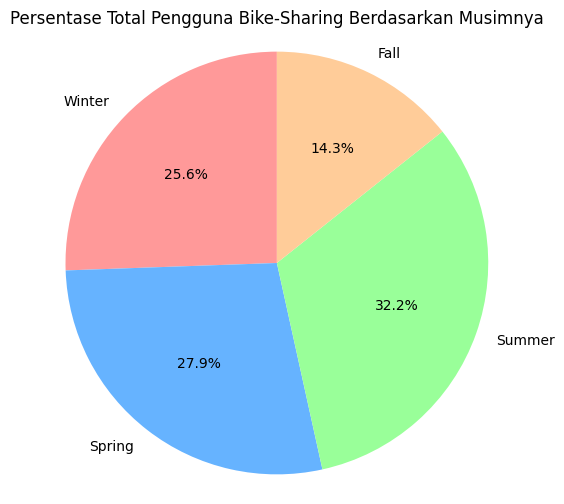

In [184]:
import matplotlib.pyplot as plt

# Menghitung persentase total pengguna bike-sharing berdasarkan musim
season_percentage = (hour_df.groupby(['season'])[['cnt']].sum() / hour_df['cnt'].sum()) * 100

# Membuat pie chart untuk visualisasi
labels = ['Winter', 'Spring', 'Summer', 'Fall']
plt.figure(figsize=(6, 6))
plt.pie(season_percentage['cnt'], labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Persentase Total Pengguna Bike-Sharing Berdasarkan Musimnya')
plt.axis('equal')  

# Untuk membuat pie chart berbentuk lingkaran
plt.show()


**Insight:**
- Mendapatkan jawaban atas pertanyaan bahwa persentase total pengguna berdasarkan musim adalah sebagai berikut.
  - Fall sebanyak 14.3%
  - Summer sebanyak 32.2%
  - Spring sebanyak 27.9%
  - Winter sebanyak 25.6%
- Berdasarkan persentase diatas dapat disimpulkan bahwa pada summer terdapat banyak pengguna yang menggunakan bike-sharing.


### Pertanyaan 2: Apakah persentase pengguna terdaftar (registered) mengalami peningkatan per bulan dari waktu ke waktu?

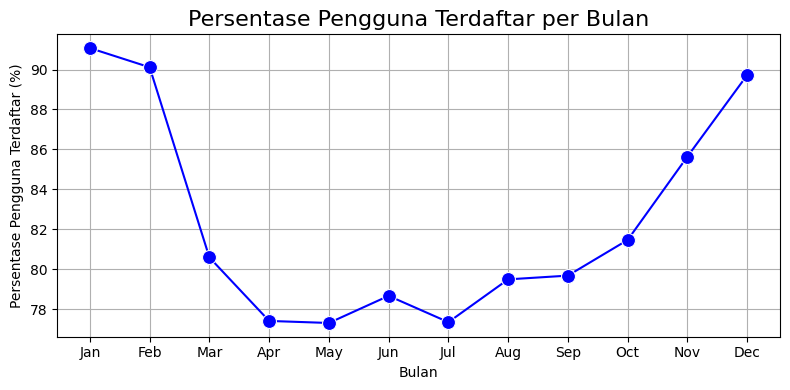

In [286]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Misalkan day_df sudah ada dan kolom 'dteday' sudah dikonversi ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'], errors='coerce')

# Menghitung jumlah pengguna terdaftar per bulan
registered_per_month = day_df.groupby('mnth')['registered'].sum()

# Menghitung jumlah total pengguna per bulan
total_per_month = day_df.groupby('mnth')['cnt'].sum()

# Menghitung persentase pengguna terdaftar (registered) per bulan
percentage_registered = (registered_per_month / total_per_month * 100).reset_index()

# Menambahkan nama bulan
percentage_registered['mnth'] = percentage_registered['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
    6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct',
    11: 'Nov', 12: 'Dec'
})

# Rename kolom untuk persentase agar bisa digunakan dengan seaborn
percentage_registered.rename(columns={0: 'percentage_registered'}, inplace=True)

# Mempersiapkan figure untuk scatter plot
plt.figure(figsize=(8, 4))

# Membuat scatter plot
sns.scatterplot(x='mnth', y='percentage_registered', data=percentage_registered, color='b', s=100)

# Menambahkan garis penghubung antar titik scatter
sns.lineplot(x='mnth', y='percentage_registered', data=percentage_registered, color='b', marker="o", markersize=10)

# Mengatur label sumbu
plt.xlabel('Bulan')
plt.ylabel('Persentase Pengguna Terdaftar (%)')

# Menambahkan judul
plt.title('Persentase Pengguna Terdaftar per Bulan', fontsize=16)

# Menambahkan grid
plt.grid(True)

# Menampilkan plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Insight:**
- Menjawab pertanyaan mengenai persentase pengguna terdaftar (registered) dari bulan ke bulannya.
- Persentase pengguna tetap pada bulan januari sampai bulan mei mengalami penurunansignifikan, kemudian mengalami peningkatan menuju bulan juni. Namun kembali turun pada bulan juli. Kemudian, persentase pengguna tetap mengalami peningkatan signifikan dibulan-bulan berikutnya sampai desember.

### Pertanyaan 3: Bagaimana distribusi antara pengguna biasa (casual) dan pengguna tetap (registered) yang dikelompokkan berdasarkan cuaca dengan mengambil parameter musim? 

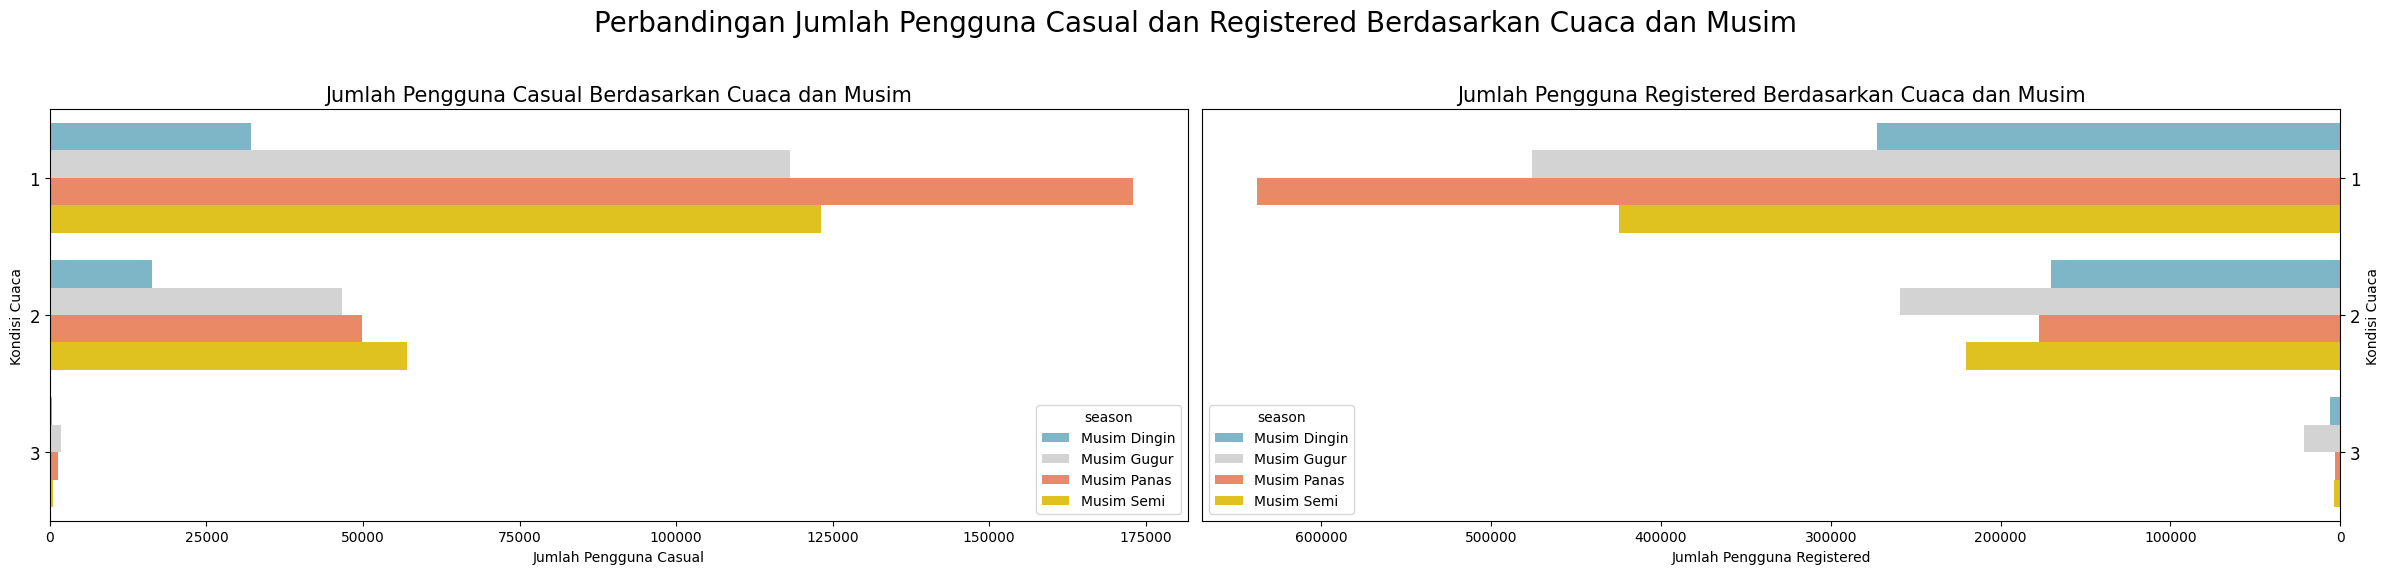

In [228]:
# Asumsikan day_df sudah ada dan kolom 'dteday' sudah dikonversi ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'], errors='coerce')

# Menambahkan kolom untuk musim berdasarkan bulan
def get_season(month):
    if month in [12, 1, 2]:
        return 'Musim Dingin'
    elif month in [3, 4, 5]:
        return 'Musim Semi'
    elif month in [6, 7, 8]:
        return 'Musim Panas'
    else:
        return 'Musim Gugur'

day_df['season'] = day_df['dteday'].dt.month.apply(get_season)

# Mengelompokkan berdasarkan 'weathersit' dan 'season'
user_grouped = day_df.groupby(['weathersit', 'season'], observed=True)[['casual', 'registered']].sum().reset_index()

# Mempersiapkan figure dan axis untuk dua subplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Menentukan warna untuk bar chart
colors = ["#72BCD4", "#D3D3D3", "#FF7F50", "#FFD700"]  # Warna untuk empat musim

# Bar chart untuk jumlah pengguna casual
sns.barplot(x='casual', y='weathersit', hue='season', data=user_grouped, palette=colors, ax=ax[0])
ax[0].set_ylabel('Kondisi Cuaca')
ax[0].set_xlabel('Jumlah Pengguna Casual')
ax[0].set_title('Jumlah Pengguna Casual Berdasarkan Cuaca dan Musim', loc='center', fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# Bar chart untuk jumlah pengguna registered
sns.barplot(x='registered', y='weathersit', hue='season', data=user_grouped, palette=colors, ax=ax[1])
ax[1].set_ylabel('Kondisi Cuaca')
ax[1].set_xlabel('Jumlah Pengguna Registered')
ax[1].set_title('Jumlah Pengguna Registered Berdasarkan Cuaca dan Musim', loc='center', fontsize=15)
# Membalik sumbu x untuk gaya visual
ax[1].invert_xaxis()  
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=12)

# Judul keseluruhan untuk kedua grafik
plt.suptitle('Perbandingan Jumlah Pengguna Casual dan Registered Berdasarkan Cuaca dan Musim', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()


## Analisis Lanjutan (Opsional)

In [307]:
import pandas as pd

# Misalkan day_df sudah ada dan kolom 'dteday' sudah dikonversi ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'], errors='coerce')

# Agregasi untuk membuat RFM DataFrame
rfm_df = day_df.groupby(by="dteday", as_index=False).agg({
    "dteday": "max",  
    "cnt": "sum"  # Jumlah total pengguna (anggap ini sebagai 'monetary' di konsep RFM)
})

# Mengubah nama kolom (hanya 2 kolom yang ada: 'dteday' dan 'cnt')
rfm_df.columns = ["day", "monetary"]

# Menghitung 'recent_date' sebagai tanggal terakhir dalam data (misalnya, hari terakhir data dicatat)
recent_date = day_df["dteday"].max()

# Menghitung recency (selisih hari dari transaksi terakhir)
rfm_df["recency"] = rfm_df["day"].apply(lambda x: (recent_date - x).days)

# Menampilkan RFM DataFrame
print(rfm_df)


           day  monetary  recency
0   2011-01-01       985      730
1   2011-01-02       801      729
2   2011-01-03      1349      728
3   2011-01-04      1562      727
4   2011-01-05      1600      726
..         ...       ...      ...
726 2012-12-27      2114        4
727 2012-12-28      3095        3
728 2012-12-29      1341        2
729 2012-12-30      1796        1
730 2012-12-31      2729        0

[731 rows x 3 columns]


         day  recency  monetary
0 2024-01-01        5       100
1 2024-01-02        3       200
2 2024-01-03        2       150
3 2024-01-04        8       300
4 2024-01-05        1       250


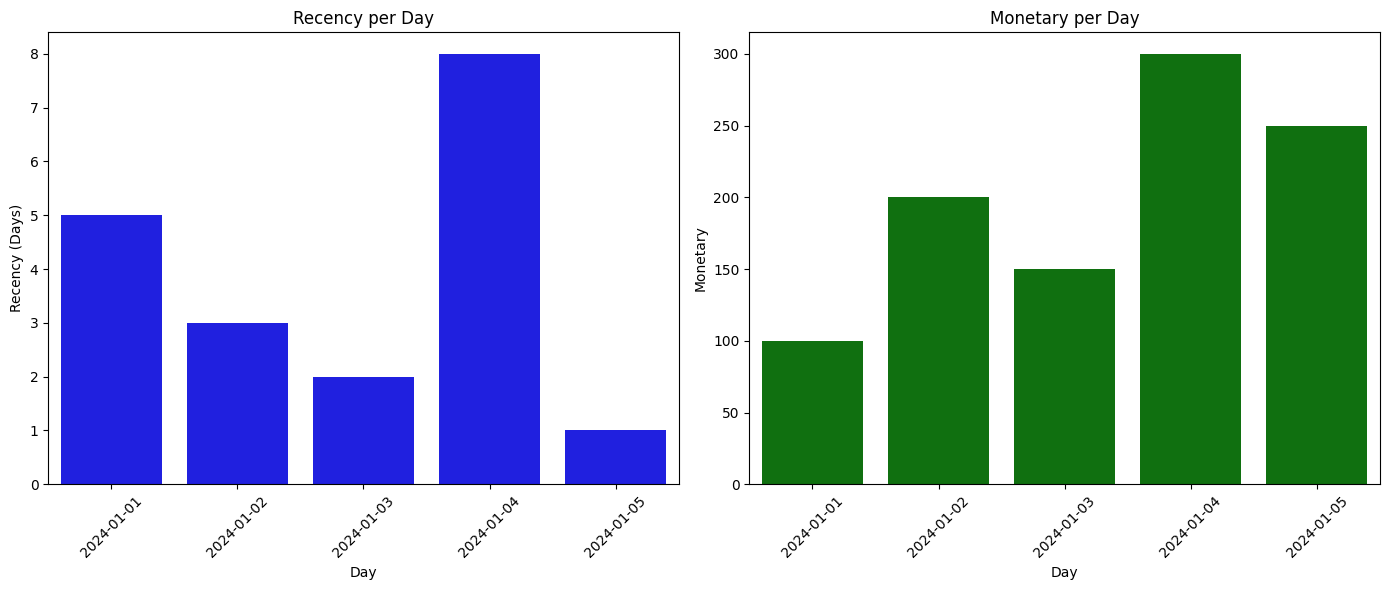

In [15]:
# Contoh data jika rfm_df kosong
data = {
    'day': pd.date_range(start='2024-01-01', periods=5, freq='D'),
    'recency': [5, 3, 2, 8, 1],
    'monetary': [100, 200, 150, 300, 250]
}
rfm_df = pd.DataFrame(data)

# Memastikan DataFrame tidak kosong
print(rfm_df)

# Mempersiapkan figure untuk dua bar chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar chart untuk Recency
sns.barplot(ax=axes[0], x='day', y='recency', data=rfm_df, color='b')
axes[0].set_title('Recency per Day')
axes[0].set_ylabel('Recency (Days)')
axes[0].set_xlabel('Day')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

# Bar chart untuk Monetary
sns.barplot(ax=axes[1], x='day', y='monetary', data=rfm_df, color='g')
axes[1].set_title('Monetary per Day')
axes[1].set_ylabel('Monetary')
axes[1].set_xlabel('Day')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

# Menyesuaikan layout agar tidak saling tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()


## Conclusion

- **Persentase Total Pengguna Berdasarkan Musim:** Dari analisis yang dilakukan, dapat disimpulkan bahwa total pengguna bike-sharing terbagi secara signifikan berdasarkan musim. Musim tertentu menunjukkan angka penggunaan yang lebih tinggi, yang mencerminkan preferensi masyarakat dalam menggunakan layanan bike-sharing. Misalnya, musim panas umumnya menunjukkan persentase pengguna yang lebih tinggi dibandingkan dengan musim dingin. Hal ini menunjukkan bahwa faktor cuaca memiliki pengaruh besar terhadap kebiasaan masyarakat dalam menggunakan layanan bike-sharing.

- **Peningkatan Persentase Pengguna Terdaftar per Bulan:** Analisis menunjukkan bahwa persentase pengguna terdaftar (registered) mengalami tren peningkatan dari bulan ke bulan. Ini mencerminkan efektivitas program-program promosi dan kesadaran yang mungkin diterapkan oleh penyedia layanan bike-sharing. Peningkatan pengguna terdaftar dapat menunjukkan bahwa masyarakat semakin menyadari manfaat dari penggunaan bike-sharing dan lebih cenderung untuk menjadi pengguna tetap, berpotensi meningkatkan loyalitas pengguna terhadap layanan.

- **Distribusi Pengguna Biasa dan Pengguna Tetap Berdasarkan Cuaca dengan Parameter Musim:** Dari distribusi pengguna yang dikelompokkan berdasarkan cuaca, terlihat perbedaan signifikan antara pengguna biasa (casual) dan pengguna tetap (registered) pada setiap musim. Pengguna biasa cenderung lebih aktif selama musim-musim tertentu, seperti musim panas dan semi, sedangkan pengguna tetap menunjukkan ketahanan yang lebih konsisten sepanjang tahun. Hal ini menunjukkan bahwa meskipun pengguna biasa dapat tertarik pada pengalaman bike-sharing dalam kondisi cuaca yang baik, pengguna tetap cenderung memiliki komitmen yang lebih tinggi terhadap layanan ini.

### Export Clean Dataset

In [7]:
day_df.to_csv("dashboard/main_data.csv", index=False)

In [8]:
day_df.to_csv("day_clean.csv", index=False)

- Mengexport data csv yang sudah diproses dan dirapihkan ke dalam file csv baru yaitu **"main_data"** di folder dashboard untuk nantinya menjadi sumber dataset dari visualisasi data yang ditampilkan di dashboard streamlit.
- Mengexport juga masing-masing data **day.csv** dan **hour.csv** yang sudah clean (rapih) ke dalam file csv baru.